### This creates the dataset.

As you see, the true number of modes is three.
Of course you didn't know this, as I gave you the file...

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=13, usetex=True)
# Set a seed for reproducibility
random_state = np.random.RandomState(seed=1)
import os

/Users/dgerosa/box/lib/python3.11/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [2]:
X = np.concatenate([random_state.normal(9, 5, 350),
                    random_state.normal(20, 1, 600),
                    random_state.normal(30, 5, 2000)]).reshape(-1, 1)

if not os.path.isfile("formationchannels.npy"):
    np.save("formationchannels.npy",X)


You start from here...

### Quick data exploration

(always explore the data before starting)

In [3]:
X=np.load("formationchannels.npy")

[[17.12172682]
 [ 5.94121793]
 [ 6.35914124]
 ...
 [34.34170191]
 [30.27018478]
 [25.93264098]]


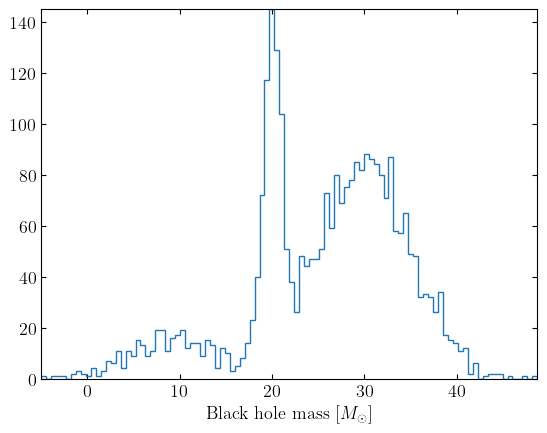

In [4]:
plt.hist(X,bins=100,histtype='step');
plt.xlabel("Black hole mass $[M_\odot]$")
print(X)

### Learn the best-fit GaussianMixture models

Here we'll use scikit-learn's GaussianMixture model, first fit the model

In [6]:
# fit models with 1-10 components
Ns = np.arange(1, 10)

models=[GaussianMixture(N).fit(X) for N in Ns]

### Compute the AIC. 
It's built in into sklearn.mixture.GaussianMixture  (otherwise you can compute it from the maximum likelihood)

In [7]:
AIC = [m.aic(X) for m in models]

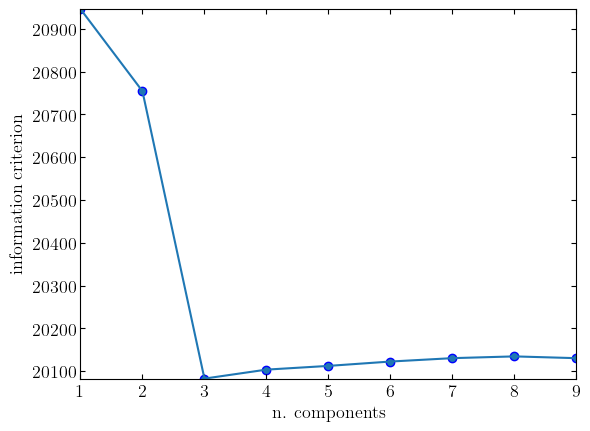

In [8]:
plt.plot(Ns, AIC,)
plt.scatter(Ns, AIC)

plt.xlabel('n. components')
plt.ylabel('information criterion');

In [9]:
print('The AIC is minimized for N=', Ns[np.argmin(AIC)])

The AIC is minimized for N= 3


which is indeed is our true value. 

### Explore results

Let's plot this specific solution now:

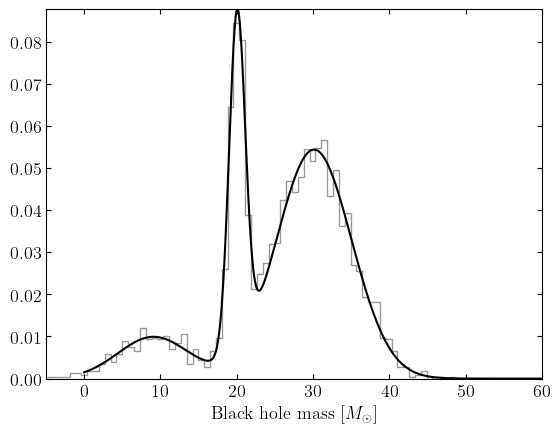

In [10]:
M_best = models[np.argmin(AIC)]

x = np.linspace(0, 60, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)

plt.hist(X, 70, density=True, histtype='step', alpha=0.4,color='black')

plt.plot(x, pdf, 'k')

plt.xlabel("Black hole mass $[M_\odot]$");

Let's compare some results

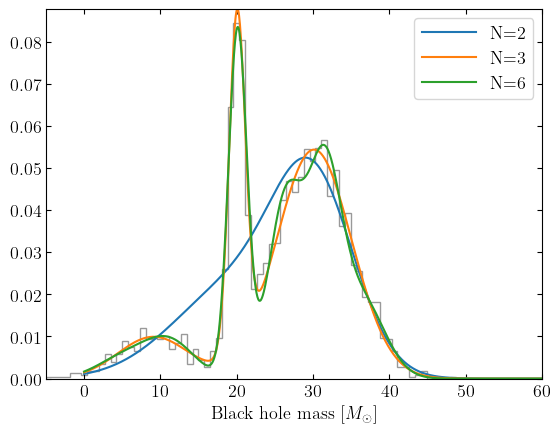

In [13]:
plt.hist(X, 70, density=True, histtype='step', alpha=0.4,color='black')

for index in np.argmin(AIC)+np.array([-1,0,3]):

    logprob = models[index].score_samples(x.reshape(-1, 1))
    plt.plot(x, np.exp(logprob),label='N='+str(Ns[index]))

plt.xlabel("Black hole mass $[M_\odot]$")
plt.legend();

Surely N=2 is a terrible fit. But N=5 looks better than 3! Sure, if fits better, but Occam's razor is telling us that capturing those additional details is not enough to justify adding more parameters.

In [94]:
# #Another way of representing the responsibilities

# p = responsibilities
# p = p.cumsum(axis=1).T

# plt.fill_between(x, 0, p[0], color='C0', alpha=0.3)
# plt.fill_between(x, p[0], p[1], color='C1', alpha=0.3)
# plt.fill_between(x, p[1], 1, color='C2', alpha=0.3)
# plt.ylim(0, 1)
# plt.xlabel("Black hole mass $[M_\odot]$")

# plt.ylabel(r'$p({\rm class})$');


In [95]:
# Can try with a different goodness-of-fit estimator. 
# [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion) 
# is a variant of AIC which is also implemented in sklearn. 

# BIC = [m.bic(X) for m in models]
# plt.plot(N, BIC,)
# plt.scatter(N, BIC)
# plt.xlabel('n. components')
# plt.ylabel('information criterion');

In [96]:
# Access the individual modes now.

# responsibilities = M_best.predict_proba(x.reshape(-1, 1))
# pdf_individual = responsibilities * pdf[:, np.newaxis]

# plt.hist(X, 70, density=True, histtype='step', alpha=0.4,color='black')
# plt.plot(x, pdf_individual[:,0], c='C0')
# plt.plot(x, pdf_individual[:,1], c='C1')
# plt.plot(x, pdf_individual[:,2], c='C2')
# plt.plot(x, pdf, '--k')

# plt.xlabel("Black hole mass $[M_\odot]$");